In [1]:
# import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
import logging

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.model_selection import StratifiedKFold  # if needed for classification; here we use regression
import sklearn
from tabulate import tabulate 


In [2]:
LOG_DIR = "/mnt/c/Users/WSTATION/Desktop/MACHINE_LEARNING/log_folder"
os.makedirs(LOG_DIR, exist_ok=True)  # [QA CHANGE] Ensure directory exists
# /mnt/c/Users/WSTATION/Desktop/NEW_ETL
LOG_FILE = os.path.join(LOG_DIR, "rf_v1.log")
logging.basicConfig(
    filename=LOG_FILE,
    filemode='a',
    level=logging.DEBUG,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

# Helper function for simultaneous logging and log_and_log_and_printing
def log_and_print(message, level=logging.INFO):
    print(message)
    logging.log(level, message)
# log_and_print current working directory, version and file of sklearn
print(f"Current working directory: {os.getcwd()}")
print(f"sklearn version: {sklearn.__version__}")
print(f"sklearn location: {sklearn.__file__}")

Current working directory: /home/wstation/projects
sklearn version: 1.4.2
sklearn location: /home/wstation/miniconda3/envs/newenv/lib/python3.12/site-packages/sklearn/__init__.py


In [3]:
# ================================
# 1) Data Loading and Exploration
# ================================

log_and_print("\n================ Data Loading and Initial Exploration ================")

# load the dataset
data_path = "/mnt/c/Users/WSTATION/Desktop/MACHINE_LEARNING/data/merged_final_df.feather"
merged_df_clean = pd.read_feather(data_path)
log_and_print(f"Data loaded successfully from: {data_path}")

log_and_print("\n---------- Column Data Types (merged_df_clean) ----------")
log_and_print(str(merged_df_clean.dtypes))

# log_and_print preview tables
log_and_print("\n----------merged_df_clean-----------------")
log_and_print(tabulate(merged_df_clean.head(), headers='keys', tablefmt='pretty', showindex=False))

# Inspect mean_ozone_pred column in merged_df_clean
log_and_print("\n--- Inspecting mean_ozone_pred column in merged_df_clean ---")
log_and_print(f"Missing values in mean_ozone_pred: {merged_df_clean['mean_ozone_pred'].isnull().sum()}")
log_and_print("Descriptive statistics for mean_ozone_pred (overall):")
log_and_print(str(merged_df_clean['mean_ozone_pred'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])))

# Inspect Data_Value column in merged_df_clean
log_and_print("\n--- InspectingData_Value column in merged_df_clean ---")
log_and_print(f"Missing values in Data_Value: {merged_df_clean['Data_Value'].isnull().sum()}")
log_and_print("Descriptive statistics for Data_Value (overall):")
log_and_print(str(merged_df_clean['Data_Value'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])))

# Verify unique countyfips counts per year for merged_df_clean
log_and_print("\n--- Unique countyfips counts per year (merged_df_clean) ---")
log_and_print(str(merged_df_clean.groupby('year')['countyfips'].nunique()))

log_and_print("\nCVD Data Info:")
import io
buffer = io.StringIO()
merged_df_clean.info(verbose=True, show_counts=True, buf=buffer)
log_and_print(buffer.getvalue())

log_and_print("\nCVD Data Types:")
log_and_print(str(merged_df_clean.dtypes))

log_and_print("\nMissing values in CVD Data:")
log_and_print(str(merged_df_clean.isnull().sum()))

# Stratification 1
log_and_print("\n-------------Stratification1-------------") 
log_and_print(f"Unique GeographicLevels: {', '.join(merged_df_clean['GeographicLevel'].unique())}")
log_and_print(f"Unique DataSources: {', '.join(merged_df_clean['DataSource'].unique())}")
log_and_print(f"Unique Classes: {', '.join(merged_df_clean['Class'].unique())}")
log_and_print(f"Unique Topics (sample): {', '.join(merged_df_clean['Topic'].unique()[:20])}")
log_and_print(f"Unique Data_Value_Units: {', '.join(merged_df_clean['Data_Value_Unit'].unique())}")
log_and_print(f"Unique Data_Value_Types: {', '.join(merged_df_clean['Data_Value_Type'].unique())}")
log_and_print(f"Unique StratificationCategory1: {', '.join(merged_df_clean['StratificationCategory1'].unique())}")
log_and_print(f"Unique Stratification1 (sample): {', '.join(merged_df_clean['Stratification1'].unique()[:10])}")

log_and_print("\n---------------------------")

# Stratification 2 
log_and_print("\n-------------Stratification2-------------") 
log_and_print(f"Unique GeographicLevels: {', '.join(merged_df_clean['GeographicLevel'].unique())}")
log_and_print(f"Unique DataSources: {', '.join(merged_df_clean['DataSource'].unique())}")
log_and_print(f"Unique Classes: {', '.join(merged_df_clean['Class'].unique())}")
log_and_print(f"Unique Topics (sample): {', '.join(merged_df_clean['Topic'].unique()[:20])}")
log_and_print(f"Unique Data_Value_Units: {', '.join(merged_df_clean['Data_Value_Unit'].unique())}")
log_and_print(f"Unique Data_Value_Types: {', '.join(merged_df_clean['Data_Value_Type'].unique())}")
log_and_print(f"Unique StratificationCategory2: {', '.join(merged_df_clean['StratificationCategory2'].unique())}")
log_and_print(f"Unique Stratification2 (sample): {', '.join(merged_df_clean['Stratification2'].unique()[:10])}")

log_and_print("\n---------------------------")

# Stratification 3
log_and_print("\n-------------Stratification3-------------") 
log_and_print(f"Unique GeographicLevels: {', '.join(merged_df_clean['GeographicLevel'].unique())}")
log_and_print(f"Unique DataSources: {', '.join(merged_df_clean['DataSource'].unique())}")
log_and_print(f"Unique Classes: {', '.join(merged_df_clean['Class'].unique())}")
log_and_print(f"Unique Topics (sample): {', '.join(merged_df_clean['Topic'].unique()[:20])}")
log_and_print(f"Unique Data_Value_Units: {', '.join(merged_df_clean['Data_Value_Unit'].unique())}")
log_and_print(f"Unique Data_Value_Types: {', '.join(merged_df_clean['Data_Value_Type'].unique())}")
log_and_print(f"Unique StratificationCategory3: {', '.join(merged_df_clean['StratificationCategory3'].unique())}")
log_and_print(f"Unique Stratification3 (sample): {', '.join(merged_df_clean['Stratification3'].unique()[:10])}")


================ Data Loading and Initial Exploration ================
Data loaded successfully from: /mnt/c/Users/WSTATION/Desktop/MACHINE_LEARNING/data/merged_final_df.feather

---------- Column Data Types (merged_df_clean) ----------
year                         int64
countyfips                  object
mean_ozone_pred            float64
median_ozone_pred          float64
max_ozone_pred             float64
p95_ozone_pred             float64
std_ozone_pred             float64
LocationAbbr                object
LocationDesc                object
GeographicLevel             object
DataSource                  object
Class                       object
Topic                       object
Data_Value                 float64
Data_Value_Unit             object
Data_Value_Type             object
Confidence_limit_Low       float64
Confidence_limit_High      float64
StratificationCategory1     object
Stratification1             object
StratificationCategory2     object
Stratification2            


--- Inspecting 'Data_Value' (CVD Mortality Rate) ---

Descriptive statistics for original Data_Value:
count    2.056590e+06
mean     5.001543e+02
std      6.432428e+02
min      1.500000e+00
1%       5.400000e+00
5%       1.020000e+01
25%      4.490000e+01
50%      1.889000e+02
75%      7.088000e+02
95%      1.920900e+03
99%      2.522800e+03
max      4.139000e+03
Name: Data_Value, dtype: float64
Skewness of original Data_Value: 1.56

--- Applying Log Transformation to 'Data_Value' ---
Min Data_Value before transformation: 1.5
Applied log (natural log) transformation to Data_Value.

Descriptive statistics for log_cvd_mortality_rate:
count    2.056590e+06
mean     5.126623e+00
std      1.706773e+00
min      4.054651e-01
1%       1.686399e+00
5%       2.322388e+00
25%      3.804438e+00
50%      5.241218e+00
75%      6.563573e+00
95%      7.560549e+00
99%      7.833125e+00
max      8.328209e+00
Name: log_cvd_mortality_rate, dtype: float64
Skewness of log_cvd_mortality_rate: -0.24


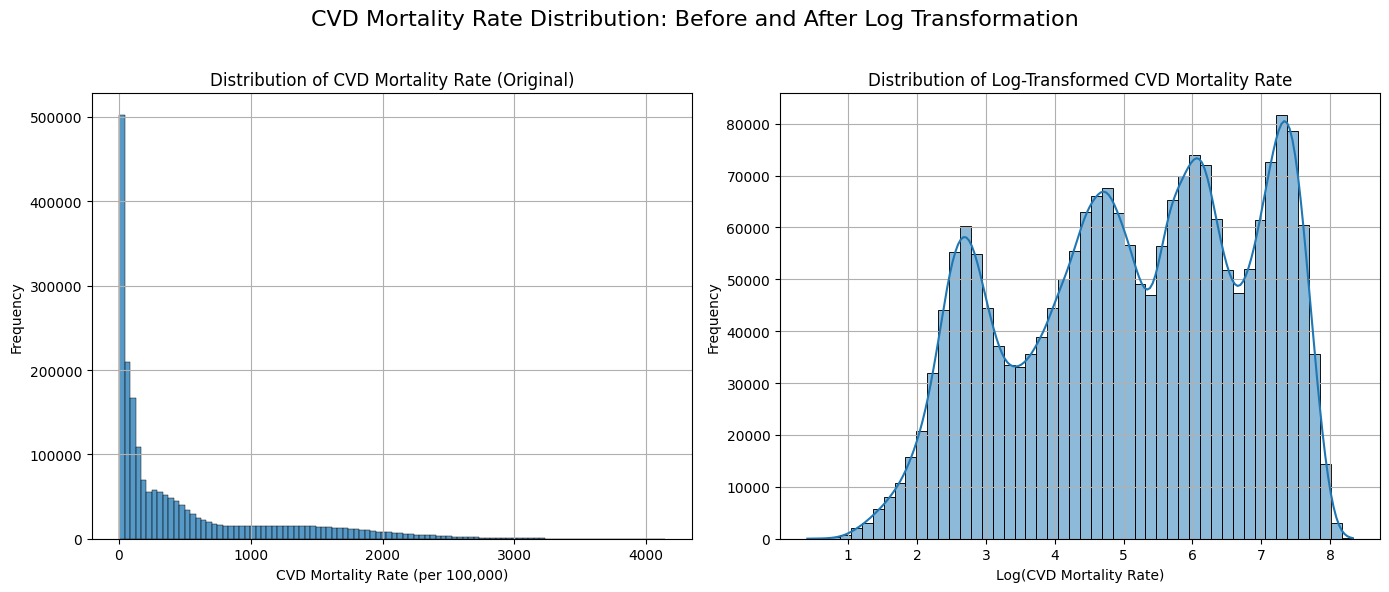


Sample of merged_df_clean with Data_Value and log_cvd_mortality_rate:
+------+------------+------------+------------------------+------------------------------+-------------+
| year | countyfips | Data_Value | log_cvd_mortality_rate |            Topic             | popestimate |
+------+------------+------------+------------------------+------------------------------+-------------+
| 2001 |   10001    |   148.0    |   4.997212273764115    |      All heart disease       |   128821    |
| 2001 |   10001    |    16.1    |   2.7788192719904172   |          All stroke          |   128821    |
| 2001 |   10001    |   110.8    |   4.707726774313183    | Coronary heart disease (CHD) |   128821    |
| 2001 |   10001    |   170.8    |    5.14049328135447    | Cardiovascular disease (CVD) |   128821    |
| 2001 |   10001    |    20.6    |   3.0252910757955354   |        Heart failure         |   128821    |
+------+------------+------------+------------------------+------------------------------

In [4]:
# log transform cvd cell
if 'merged_df_clean' in locals() and isinstance(merged_df_clean, pd.DataFrame):
    if 'Data_Value' not in merged_df_clean.columns:
        log_and_print("ERROR: 'Data_Value' column not found in merged_df_clean.", level=logging.ERROR if 'logging' in locals() else None)
    else:
        log_and_print("\n--- Inspecting 'Data_Value' (CVD Mortality Rate) ---")

        # 1a. Descriptive Statistics for original Data_Value
        log_and_print("\nDescriptive statistics for original Data_Value:")
        log_and_print(str(merged_df_clean['Data_Value'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])))
        original_cvd_skewness = merged_df_clean['Data_Value'].skew()
        log_and_print(f"Skewness of original Data_Value: {original_cvd_skewness:.2f}") # Should be high

        # 2a. Visualize the Distribution of original Data_Value
        plt.figure(figsize=(14, 6)) # Adjusted figure size for two subplots

        plt.subplot(1, 2, 1) # First subplot for original data
        sns.histplot(merged_df_clean['Data_Value'], kde=False, bins=100) # kde=False might be better for highly skewed
        plt.title('Distribution of CVD Mortality Rate (Original)')
        plt.xlabel('CVD Mortality Rate (per 100,000)')
        plt.ylabel('Frequency')
        plt.grid(True)

        # --- Log Transforming 'Data_Value' ---
        log_and_print("\n--- Applying Log Transformation to 'Data_Value' ---")
        min_data_value = merged_df_clean['Data_Value'].min()
        log_and_print(f"Min Data_Value before transformation: {min_data_value}")

        if min_data_value <= 0:
            merged_df_clean['log_cvd_mortality_rate'] = np.log1p(merged_df_clean['Data_Value']) # log(1+x)
            log_and_print("Applied log1p (log(1+x)) transformation to Data_Value.")
        else:
            merged_df_clean['log_cvd_mortality_rate'] = np.log(merged_df_clean['Data_Value'])
            log_and_print("Applied log (natural log) transformation to Data_Value.")

        # --- Inspecting 'log_cvd_mortality_rate' (After Log Transformation) ---
        if 'log_cvd_mortality_rate' in merged_df_clean.columns:
            # 1b. Descriptive Statistics for log_cvd_mortality_rate
            log_and_print("\nDescriptive statistics for log_cvd_mortality_rate:")
            log_and_print(str(merged_df_clean['log_cvd_mortality_rate'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])))
            skewness_log_cvd = merged_df_clean['log_cvd_mortality_rate'].skew()
            log_and_print(f"Skewness of log_cvd_mortality_rate: {skewness_log_cvd:.2f}") # Should be closer to 0

            # 2b. Visualize the Distribution of log_cvd_mortality_rate
            plt.subplot(1, 2, 2) # Second subplot for log-transformed data
            sns.histplot(merged_df_clean['log_cvd_mortality_rate'], kde=True, bins=50)
            plt.title('Distribution of Log-Transformed CVD Mortality Rate')
            plt.xlabel('Log(CVD Mortality Rate)')
            plt.ylabel('Frequency')
            plt.grid(True)
            
            plt.suptitle('CVD Mortality Rate Distribution: Before and After Log Transformation', fontsize=16)
            plt.tight_layout(rect=[0, 0, 1, 0.96]) # adjust layout to make space for suptitle
            
            # plt.savefig(os.path.join(LOG_DIR, "cvd_mortality_rate_before_after_log_transform.png"))
            plt.show()

            # 3. Sample Data 
            log_and_print("\nSample of merged_df_clean with Data_Value and log_cvd_mortality_rate:")
            cols_to_show_cvd = ['year', 'countyfips', 'Data_Value', 'log_cvd_mortality_rate', 'Topic', 'popestimate']
            cols_to_show_cvd = [col for col in cols_to_show_cvd if col in merged_df_clean.columns] # ensure columns exist
            log_and_print(tabulate(merged_df_clean[cols_to_show_cvd].head(), headers='keys', tablefmt='pretty', showindex=False))
        else:
            log_and_print("'log_cvd_mortality_rate' column was not created. Cannot show 'after' state.", level=logging.ERROR if 'logging' in locals() else None)
else:
    log_and_print("merged_df_clean DataFrame or 'Data_Value' column not found. Please ensure previous steps were run.", level=logging.ERROR if 'logging' in locals() else None)


--- Inspecting 'popestimate' column (Before Log Transformation) ---

Descriptive statistics for original popestimate:
count    2.056590e+06
mean     1.386017e+05
std      3.955778e+05
min      1.123000e+03
1%       2.889000e+03
5%       5.471000e+03
25%      1.502900e+04
50%      3.538550e+04
75%      1.046870e+05
95%      6.228580e+05
99%      1.612630e+06
max      1.006662e+07
Name: popestimate, dtype: float64
Skewness of original popestimate: 11.77

--- Inspecting 'log_popestimate' column (After Log Transformation) ---

Descriptive statistics for log_popestimate:
count    2.056590e+06
mean     1.064762e+01
std      1.426504e+00
min      7.024649e+00
1%       7.969012e+00
5%       8.607399e+00
25%      9.617803e+00
50%      1.047409e+01
75%      1.155874e+01
95%      1.334208e+01
99%      1.429338e+01
max      1.612474e+01
Name: log_popestimate, dtype: float64
Skewness of log_popestimate: 0.52


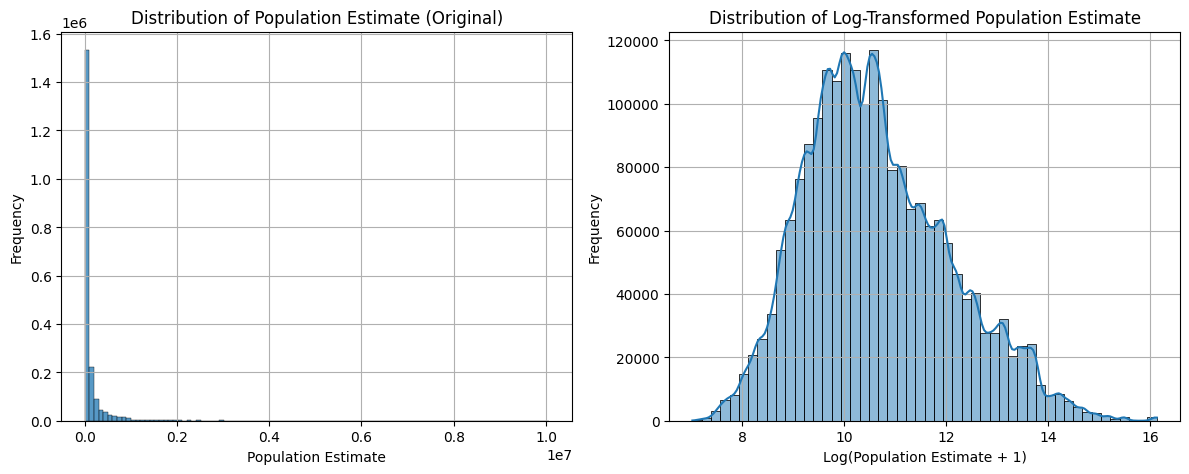


Sample of merged_df_clean with popestimate and log_popestimate:
+------+------------+-------------+--------------------+------------------------------+
| year | countyfips | popestimate |  log_popestimate   |            Topic             |
+------+------------+-------------+--------------------+------------------------------+
| 2001 |   10001    |   128821    | 11.766186885519874 |      All heart disease       |
| 2001 |   10001    |   128821    | 11.766186885519874 |          All stroke          |
| 2001 |   10001    |   128821    | 11.766186885519874 | Coronary heart disease (CHD) |
| 2001 |   10001    |   128821    | 11.766186885519874 | Cardiovascular disease (CVD) |
| 2001 |   10001    |   128821    | 11.766186885519874 |        Heart failure         |
+------+------------+-------------+--------------------+------------------------------+


In [5]:
# log transform popestimate
pop_skewness = merged_df_clean['popestimate'].skew()
if pop_skewness > 1.0:
    merged_df_clean['log_popestimate'] = np.log1p(merged_df_clean['popestimate'])
    pop_feature_to_use = 'log_popestimate'
else:
    pop_feature_to_use = 'popestimate'


if 'merged_df_clean' in locals() and isinstance(merged_df_clean, pd.DataFrame):
    if 'popestimate' not in merged_df_clean.columns:
        log_and_print("ERROR: 'popestimate' column not found in merged_df_clean.", level=logging.ERROR if 'logging' in locals() else None)
    else:
        log_and_print("\n--- Inspecting 'popestimate' column (Before Log Transformation) ---")
        # 1a. Descriptive Statistics for original popestimate
        log_and_print("\nDescriptive statistics for original popestimate:")
        log_and_print(str(merged_df_clean['popestimate'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])))
        original_pop_skewness = merged_df_clean['popestimate'].skew()
        log_and_print(f"Skewness of original popestimate: {original_pop_skewness:.2f}") # Should be ~11.77

        # 2a. Visualize the Distribution of original popestimate
        plt.figure(figsize=(12, 5)) # Create figure for two subplots

        plt.subplot(1, 2, 1) # First subplot for original data
        sns.histplot(merged_df_clean['popestimate'], kde=False, bins=100) # kde=False might be better for highly skewed
        plt.title('Distribution of Population Estimate (Original)')
        plt.xlabel('Population Estimate')
        plt.ylabel('Frequency')
        plt.grid(True)

        # ensure 'log_popestimate' exists from previous transformation step
        if 'log_popestimate' not in merged_df_clean.columns:
            log_and_print("\n'log_popestimate' column not found...", level=logging.WARNING if 'logging' in locals() else None)
            if original_pop_skewness > 1.0: 
                 merged_df_clean['log_popestimate'] = np.log1p(merged_df_clean['popestimate'])
                 log_and_print("Applied log1p transformation to popestimate for the plot.")
            else: # Should not happen given original_pop_skewness was 11.77
                 merged_df_clean['log_popestimate'] = merged_df_clean['popestimate'] 


        if 'log_popestimate' in merged_df_clean.columns:
            log_and_print("\n--- Inspecting 'log_popestimate' column (After Log Transformation) ---")
            # 1b. Descriptive Statistics for log_popestimate
            log_and_print("\nDescriptive statistics for log_popestimate:")
            log_and_print(str(merged_df_clean['log_popestimate'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])))
            skewness_log_pop = merged_df_clean['log_popestimate'].skew()
            log_and_print(f"Skewness of log_popestimate: {skewness_log_pop:.2f}")

            # 2b. Visualize the Distribution of log_popestimate
            plt.subplot(1, 2, 2) # Second subplot for log-transformed data
            sns.histplot(merged_df_clean['log_popestimate'], kde=True, bins=50)
            plt.title('Distribution of Log-Transformed Population Estimate')
            plt.xlabel('Log(Population Estimate + 1)')
            plt.ylabel('Frequency')
            plt.grid(True)
            
            plt.tight_layout() # Adjust layout to prevent overlap
            # plt.savefig(os.path.join(LOG_DIR, "popestimate_before_after_log_transform.png"))
            plt.show()

            # 4. Sample Data (as before)
            log_and_print("\nSample of merged_df_clean with popestimate and log_popestimate:")
            cols_to_show_pop = ['year', 'countyfips', 'popestimate', 'log_popestimate', 'Topic']
            cols_to_show_pop = [col for col in cols_to_show_pop if col in merged_df_clean.columns] # Ensure columns exist
            log_and_print(tabulate(merged_df_clean[cols_to_show_pop].head(), headers='keys', tablefmt='pretty', showindex=False))
        else:
            log_and_print("'log_popestimate' column still not found after attempting transformation. Cannot plot 'after' state.", level=logging.ERROR if 'logging' in locals() else None)

else:
    log_and_print("merged_df_clean DataFrame not found. Please ensure previous steps were run.", level=logging.ERROR if 'logging' in locals() else None)

In [6]:
# define target cols 
TARGET_TOPIC = 'All heart disease'
TARGET_AGE_GROUP = 'Ages 35-64 years' # Or 'Ages 65 years and older'
# Filter for the specific Topic AND for 'Overall' in Stratification2 and Stratification3
df_model_input = merged_df_clean[
    (merged_df_clean['Topic'] == TARGET_TOPIC) &
    (merged_df_clean['Stratification1'] == TARGET_AGE_GROUP) & # Filter for the specific age group
    (merged_df_clean['Stratification2'] == 'Overall') & # Filter for Overall Race
    (merged_df_clean['Stratification3'] == 'Overall')   # Filter for Overall Sex
].copy()
# Stratification1 (Age) will remain as is ('Ages 35-64 years', 'Ages 65 years and older')
# because it doesn't have an 'Overall' category in the data,
# and will be included as a predictor to account for age group differences.

log_and_print(f"\nFiltered dataset for Topic == '{TARGET_TOPIC}', Stratification1 == '{TARGET_AGE_GROUP}',  Stratification2 == 'Overall', and Stratification3 == 'Overall'")
log_and_print(f"Resulting DataFrame shape for df_model_input: {df_model_input.shape}")
log_and_print("Preview of df_model_input (filtered for overall race/sex, specific topic):")
log_and_print(tabulate(df_model_input.head(), headers='keys', tablefmt='pretty', showindex=False))

# Verify the unique values in stratification columns for this new df_model_input
log_and_print("\nUnique values in df_model_input after filtering:")
if 'Stratification1' in df_model_input.columns:
    log_and_print(f"Unique Stratification1: {df_model_input['Stratification1'].unique().tolist()}")
if 'Stratification2' in df_model_input.columns:
    log_and_print(f"Unique Stratification2: {df_model_input['Stratification2'].unique().tolist()}")
if 'Stratification3' in df_model_input.columns:
    log_and_print(f"Unique Stratification3: {df_model_input['Stratification3'].unique().tolist()}")


Filtered dataset for Topic == 'All heart disease', Stratification1 == 'Ages 35-64 years',  Stratification2 == 'Overall', and Stratification3 == 'Overall'
Resulting DataFrame shape for df_model_input: (42794, 31)
Preview of df_model_input (filtered for overall race/sex, specific topic):
+------+------------+--------------------+-------------------+----------------+--------------------+--------------------+--------------+--------------+-----------------+------------+-------------------------+-------------------+------------+-----------------+--------------------------------------------------+----------------------+-----------------------+-------------------------+------------------+-------------------------+-----------------+-------------------------+-----------------+-------------+--------+---------------------+--------------------+--------------------+------------------------+--------------------+
| year | countyfips |  mean_ozone_pred   | median_ozone_pred | max_ozone_pred |   p95_oz

In [7]:
#========== Drop Columns Cell =========

columns_to_drop_from_model_input = [
    # Descriptive/Redundant location identifiers
    'LocationAbbr',
    'LocationDesc',

    # Constant after initial filtering of CVD data for target population/data type
    'GeographicLevel',  # Should be 'County' for all rows
    'DataSource',       # Should be 'NVSS' for all rows
    'Class',            # Should be 'Cardiovascular Diseases' for all rows
    'Topic',            # Will be TARGET_TOPIC for all rows after filtering
    'Stratification1', # Now constant after age group filter
    'Stratification2', # Now constant ('Overall')
    'Stratification3', # Now constant ('Overall')
    
    # Descriptive of Data_Value, not features themselves
    'Data_Value_Unit',  # Should be 'per 100,000' for all rows
    'Data_Value_Type',  # Should be 'Age-Standardized, Spatiotemporally Smoothed Rate'

    # Confidence intervals (drop for initial models)
    'Confidence_limit_Low',
    'Confidence_limit_High',

    # These are the names of the stratification categories.
    # The actual values are in Stratification1, Stratification2, Stratification3, which i am keeping
    'StratificationCategory1',
    'StratificationCategory2',
    'StratificationCategory3',

    # Original untransformed target variable
    'Data_Value',

    # self-calculated total death rates from the census data merge.
    # These are not the age-standardized CVD-specific outcome i am modeling they are from something else 
    'deaths',
    'death_rate_per_100k',
    'death_rate_per_1k',
    'death_rate_per_10k'
]

# Ensure all columns in columns_to_drop_from_model_input actually exist to avoid errors
actual_columns_to_drop = [col for col in columns_to_drop_from_model_input if col in df_model_input.columns]

log_and_print(f"\nDropping columns from df_model_input: {', '.join(actual_columns_to_drop)}")
df_model_input.drop(columns=actual_columns_to_drop, inplace=True, errors='ignore')

log_and_print("\ndf_model_input after dropping columns (sample):")
log_and_print(tabulate(df_model_input.head(), headers='keys', tablefmt='pretty', showindex=False))


Dropping columns from df_model_input: LocationAbbr, LocationDesc, GeographicLevel, DataSource, Class, Topic, Stratification1, Stratification2, Stratification3, Data_Value_Unit, Data_Value_Type, Confidence_limit_Low, Confidence_limit_High, StratificationCategory1, StratificationCategory2, StratificationCategory3, Data_Value, deaths, death_rate_per_100k, death_rate_per_1k, death_rate_per_10k

df_model_input after dropping columns (sample):
+------+------------+--------------------+-------------------+----------------+--------------------+--------------------+-------------+------------------------+--------------------+
| year | countyfips |  mean_ozone_pred   | median_ozone_pred | max_ozone_pred |   p95_ozone_pred   |   std_ozone_pred   | popestimate | log_cvd_mortality_rate |  log_popestimate   |
+------+------------+--------------------+-------------------+----------------+--------------------+--------------------+-------------+------------------------+--------------------+
| 2001 |   

In [8]:
log_and_print("\n================ Train/Test Split ================")


# Define categorical columns that still have variation and will be one-hot encoded
categorical_cols_to_encode = ['year'] # Stratification1, Stratification2 and Stratification3 are now constant
log_and_print(f"Categorical columns identified for one-hot encoding: {', '.join(categorical_cols_to_encode)}")

# Convert 'year' to categorical 
df_model_input['year'] = df_model_input['year'].astype('category')
log_and_print("Converted 'year' column to categorical data type.")

numeric_predictor_cols = [
    'mean_ozone_pred', 'median_ozone_pred', 'max_ozone_pred',
    'p95_ozone_pred', 'std_ozone_pred' ,'log_popestimate'
]

final_predictor_col_names = [col for col in (numeric_predictor_cols + categorical_cols_to_encode) 
                             if col in df_model_input.columns]

log_and_print(f"Predictor columns selected for X: {', '.join(final_predictor_col_names)}")


X = df_model_input[final_predictor_col_names].copy()

# Define target variable
target_col = 'log_cvd_mortality_rate'
y = df_model_input[target_col]

# One-hot encoding the remaining categorical variables in X
# categorical_cols_to_encode should now just be ['year', 'Stratification1']
X_encoded = pd.get_dummies(X, columns=categorical_cols_to_encode, drop_first=True)
log_and_print(f"Performed one-hot encoding on: {', '.join(categorical_cols_to_encode)}, dropping first category.")

# Log resulting encoded column data types
log_and_print("\nData Types after encoding:")
log_and_print(str(X_encoded.dtypes))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20, random_state=42
)
log_and_print("Completed train-test split (80% train, 20% test, random_state=42).")
log_and_print(f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}")
log_and_print(f"Test set size: X_test: {X_test.shape}, y_test: {y_test.shape}")



================ Train/Test Split ================
Categorical columns identified for one-hot encoding: year
Converted 'year' column to categorical data type.
Predictor columns selected for X: mean_ozone_pred, median_ozone_pred, max_ozone_pred, p95_ozone_pred, std_ozone_pred, log_popestimate, year
Performed one-hot encoding on: year, dropping first category.

Data Types after encoding:
mean_ozone_pred      float64
median_ozone_pred    float64
max_ozone_pred       float64
p95_ozone_pred       float64
std_ozone_pred       float64
log_popestimate      float64
year_2002               bool
year_2003               bool
year_2004               bool
year_2005               bool
year_2006               bool
year_2007               bool
year_2008               bool
year_2009               bool
year_2010               bool
year_2011               bool
year_2012               bool
year_2013               bool
year_2014               bool
dtype: object
Completed train-test split (80% train, 20% te

In [16]:
# ================================
# 4) Hyperparameter Tuning with RandomizedSearchCV
# ================================

log_and_print("\n================ Hyperparameter Tuning with RandomizedSearchCV ================")

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Define comprehensive parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': list(range(300, 701, 50)),  # Focus on higher values
    'max_depth': [None] + list(range(10, 31, 5)),  # Expand depth range
    'min_samples_split': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],  # Focus on lower values
    'max_features': ['sqrt', 'log2', 0.5, 0.7],  # Add float options
    'max_samples': [0.7, 0.8, 0.9, None]  # Bootstrap sample size
}
log_and_print("Defined parameter distribution for RandomizedSearchCV.")
log_and_print(f"Parameters: {param_dist}")

# Instantiate RandomForestRegressor with OOB score enabled
rf = RandomForestRegressor(random_state=42, oob_score=True, n_jobs=-1)
log_and_print("Initialized RandomForestRegressor with OOB scoring.")

# Setup RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Increased iterations for broader search
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

log_and_print("Starting RandomizedSearchCV training...")
search.fit(X_train, y_train)

# Retrieve and log best parameters
best_model = search.best_estimator_
best_params = search.best_params_
best_score = search.best_score_

log_and_print(f"Best parameters from RandomizedSearchCV: {best_params}")
log_and_print(f"Best CV RMSE score from RandomizedSearchCV: {-best_score:.4f}")

# Save best model
model_filename = os.path.join(LOG_DIR, "best_rf_model_AUG_13.joblib")
joblib.dump(best_model, model_filename)
log_and_print(f"Best RandomForest model saved as '{model_filename}'")



================ Hyperparameter Tuning with RandomizedSearchCV ================
Defined parameter distribution for RandomizedSearchCV.
Parameters: {'n_estimators': [300, 350, 400, 450, 500, 550, 600, 650, 700], 'max_depth': [None, 10, 15, 20, 25, 30], 'min_samples_split': [2, 3, 4, 5, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_features': ['sqrt', 'log2', 0.5, 0.7], 'max_samples': [0.7, 0.8, 0.9, None]}
Initialized RandomForestRegressor with OOB scoring.
Starting RandomizedSearchCV training...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=  26.2s
[CV] END max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=  26.6s
[CV] END max_depth=20, max_features=sqrt, max_samples=0.9, min_samples_leaf=1, min_samples_split=8, n_estimators=300; total time=  26.4s
[CV] END max_depth

In [17]:
# ================================
# 4b) Bayesian optimization with BayesSearchCV
# ================================
log_and_print("\n================ Bayesian optimization with BayesSearchCV ================")
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import joblib

# Define search space for Bayesian optimization
search_spaces = {
    'n_estimators': Integer(300, 700),
    'max_depth': Categorical([None, 10, 15, 20, 25, 30]),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 5),
    'max_features': Categorical(['sqrt', 'log2', 0.5, 0.7]),
    'max_samples': Real(0.7, 1.0)
}

log_and_print("Defined search space for BayesSearchCV.")
log_and_print(f"Search spaces: {search_spaces}")

# Instantiate RandomForestRegressor with OOB score enabled
rf = RandomForestRegressor(random_state=42, oob_score=True, n_jobs=-1)
log_and_print("Initialized RandomForestRegressor with OOB scoring.")

# Setup BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=rf,
    search_spaces=search_spaces,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

log_and_print("Starting BayesSearchCV training...")
bayes_search.fit(X_train, y_train)

# Retrieve and log best parameters
best_model = bayes_search.best_estimator_
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

log_and_print(f"Best parameters from BayesSearchCV: {best_params}")
log_and_print(f"Best CV RMSE score from BayesSearchCV: {-best_score:.4f}")

# Save best model
model_filename = os.path.join(LOG_DIR, "best_rf_model_bayes.joblib")
joblib.dump(best_model, model_filename)
log_and_print(f"Best RandomForest model saved as '{model_filename}'")


================ Bayesian optimization with BayesSearchCV ================
Defined search space for BayesSearchCV.
Search spaces: {'n_estimators': Integer(low=300, high=700, prior='uniform', transform='identity'), 'max_depth': Categorical(categories=(None, 10, 15, 20, 25, 30), prior=None), 'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='identity'), 'min_samples_leaf': Integer(low=1, high=5, prior='uniform', transform='identity'), 'max_features': Categorical(categories=('sqrt', 'log2', 0.5, 0.7), prior=None), 'max_samples': Real(low=0.7, high=1.0, prior='uniform', transform='identity')}
Initialized RandomForestRegressor with OOB scoring.
Starting BayesSearchCV training...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=15, max_features=0.5, max_samples=0.9798603996543502, min_samples_leaf=2, min_samples_split=7, n_estimators=466; total time=   3.2s
[CV] END max_depth=15, max_features=0.5, max_samples=0.9798603996543502, min_samples

In [ ]:
# ================================
# 5) Model Evaluation
# ================================

log_and_print("\n================ Model Evaluation ================")

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Helper functions
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred, squared=False)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics
metrics = {
    "Train": {
        "R2": r2_score(y_train, y_train_pred),
        "MAE": mean_absolute_error(y_train, y_train_pred),
        "MSE": mean_squared_error(y_train, y_train_pred),
        "RMSE": rmse(y_train, y_train_pred),
        "MAPE": mape(y_train, y_train_pred),
        "Pearson": np.corrcoef(y_train, y_train_pred)[0, 1]
    },
    "Test": {
        "R2": r2_score(y_test, y_test_pred),
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "MSE": mean_squared_error(y_test, y_test_pred),
        "RMSE": rmse(y_test, y_test_pred),
        "MAPE": mape(y_test, y_test_pred),
        "Pearson": np.corrcoef(y_test, y_test_pred)[0, 1]
    }
}

# Log and print metrics
for split in ['Train', 'Test']:
    log_and_print(f"\n{split} Set Performance Metrics:")
    log_and_print(f"  R²: {metrics[split]['R2']:.4f}")
    log_and_print(f"  MAE: {metrics[split]['MAE']:.4f}")
    log_and_print(f"  MSE: {metrics[split]['MSE']:.4f}")
    log_and_print(f"  RMSE: {metrics[split]['RMSE']:.4f}")
    log_and_print(f"  MAPE: {metrics[split]['MAPE']:.2f}%")
    log_and_print(f"  Pearson Correlation: {metrics[split]['Pearson']:.4f}")

# Out-of-Bag (OOB) score
if hasattr(best_model, "oob_score_"):
    oob_score = best_model.oob_score_
    log_and_print(f"\nOOB Score (additional validation): {oob_score:.4f}")

# Baseline Comparison: Linear Regression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_test_pred_baseline = baseline_model.predict(X_test)

baseline_metrics = {
    "R2": r2_score(y_test, y_test_pred_baseline),
    "MAE": mean_absolute_error(y_test, y_test_pred_baseline),
    "MSE": mean_squared_error(y_test, y_test_pred_baseline),
    "RMSE": rmse(y_test, y_test_pred_baseline),
    "MAPE": mape(y_test, y_test_pred_baseline),
    "Pearson": np.corrcoef(y_test, y_test_pred_baseline)[0, 1]
}

log_and_print("\nBaseline Linear Regression (Test Set):")
log_and_print(f"  R²: {baseline_metrics['R2']:.4f}")
log_and_print(f"  MAE: {baseline_metrics['MAE']:.4f}")
log_and_print(f"  MSE: {baseline_metrics['MSE']:.4f}")
log_and_print(f"  RMSE: {baseline_metrics['RMSE']:.4f}")
log_and_print(f"  MAPE: {baseline_metrics['MAPE']:.2f}%")
log_and_print(f"  Pearson Correlation: {baseline_metrics['Pearson']:.4f}")

log_and_print("Completed comprehensive model evaluation.")

# no significant difference between using hyperparameter grid/RandomizedSearchCV and BayesSearchCV



================ Model Evaluation ================

Train Set Performance Metrics:
  R²: 0.9294
  MAE: 0.0764
  MSE: 0.0098
  RMSE: 0.0988
  MAPE: 1.65%
  Pearson Correlation: 0.9780

Test Set Performance Metrics:
  R²: 0.4714
  MAE: 0.2071
  MSE: 0.0711
  RMSE: 0.2667
  MAPE: 4.45%
  Pearson Correlation: 0.6879

OOB Score (additional validation): 0.4809

Baseline Linear Regression (Test Set):
  R²: 0.1370
  MAE: 0.2720
  MSE: 0.1161
  RMSE: 0.3408
  MAPE: 5.83%
  Pearson Correlation: 0.3703
Completed comprehensive model evaluation.


/home/wstation/miniconda3/envs/newenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wstation/miniconda3/envs/newenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wstation/miniconda3/envs/newenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# ==============================================================================
# ## 5b. random split Verification
# Description: Analyze year distribution in original random split
# ==============================================================================

log_and_print("\n================ random split VERIFICATION ================")

# Recreate original random split to see year distribution
X_encoded_original = pd.get_dummies(df_model_input[['year'] + numeric_predictor_cols], 
                                   columns=['year'], drop_first=True)
y_original = df_model_input['log_cvd_mortality_rate']

# use SAME random split 
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_encoded_original, y_original, test_size=0.20, random_state=42
)

# Get the indices to trace back to original data
train_indices = X_train_orig.index
test_indices = X_test_orig.index

# check year distribution in train vs test - convert to numeric
train_years_dist = df_model_input.loc[train_indices, 'year'].astype(int).value_counts().sort_index()
test_years_dist = df_model_input.loc[test_indices, 'year'].astype(int).value_counts().sort_index()

log_and_print("YEAR DISTRIBUTION IN ORIGINAL RANDOM SPLIT:")
log_and_print("\nTraining Set Years:")
for year, count in train_years_dist.items():
    total_year = df_model_input[df_model_input['year'].astype(int) == year].shape[0]
    pct = (count / total_year) * 100
    log_and_print(f"  {year}: {count:4d} samples ({pct:5.1f}% of year {year})")

log_and_print("\nTest Set Years:")
for year, count in test_years_dist.items():
    total_year = df_model_input[df_model_input['year'].astype(int) == year].shape[0]
    pct = (count / total_year) * 100
    log_and_print(f"  {year}: {count:4d} samples ({pct:5.1f}% of year {year})")

# Key insight: Check if train set contains future years relative to test set
log_and_print("\nrandom split ANALYSIS:")
log_and_print(f"Latest year in training: {train_years_dist.index.max()}")
log_and_print(f"Earliest year in test: {test_years_dist.index.min()}")

if train_years_dist.index.max() >= test_years_dist.index.min():

    # Show specific overlap
    overlap_years = set(train_years_dist.index).intersection(set(test_years_dist.index))
    log_and_print(f"   Overlapping years: {sorted(overlap_years)}")
    
    # Calculate percentage of overlap
    total_train_samples = train_years_dist.sum()
    overlap_samples = sum([train_years_dist[year] for year in overlap_years if year in train_years_dist])
    overlap_pct = (overlap_samples / total_train_samples) * 100
    log_and_print(f"   {overlap_pct:.1f}% of training data overlaps with test years")
    

# compare actual temporal autocorrelation
temporal_autocorr = df_model_input.groupby(df_model_input['year'].astype(int))['log_cvd_mortality_rate'].mean()
log_and_print(f"\nTemporal autocorrelation (year-to-year similarity):")
for year in [2010, 2011, 2012, 2013, 2014]:
    if year in temporal_autocorr:
        log_and_print(f"{year} mean: {temporal_autocorr[year]:.3f}")

# Show the year-to-year differences
if 2011 in temporal_autocorr and 2012 in temporal_autocorr:
    diff_2011_2012 = abs(temporal_autocorr[2012] - temporal_autocorr[2011])
    log_and_print(f"2011→2012 difference: {diff_2011_2012:.3f}")
    log_and_print("Small differences mean adjacent years are very similar")
    log_and_print("Random splits exploit this similarity for 'free' performance.")



================ random split VERIFICATION ================
YEAR DISTRIBUTION IN ORIGINAL RANDOM SPLIT:

Training Set Years:
  2001: 2413 samples ( 79.0% of year 2001)
  2002: 2440 samples ( 79.8% of year 2002)
  2003: 2417 samples ( 79.1% of year 2003)
  2004: 2457 samples ( 80.4% of year 2004)
  2005: 2438 samples ( 79.8% of year 2005)
  2006: 2469 samples ( 80.8% of year 2006)
  2007: 2430 samples ( 79.5% of year 2007)
  2008: 2443 samples ( 79.9% of year 2008)
  2009: 2437 samples ( 79.7% of year 2009)
  2010: 2459 samples ( 80.4% of year 2010)
  2011: 2447 samples ( 80.0% of year 2011)
  2012: 2479 samples ( 81.1% of year 2012)
  2013: 2452 samples ( 80.2% of year 2013)
  2014: 2454 samples ( 80.3% of year 2014)

Test Set Years:
  2001:  643 samples ( 21.0% of year 2001)
  2002:  616 samples ( 20.2% of year 2002)
  2003:  639 samples ( 20.9% of year 2003)
  2004:  599 samples ( 19.6% of year 2004)
  2005:  619 samples ( 20.2% of year 2005)
  2006:  588 samples ( 19.2% of year 200


--- Back-transforming predictions and actuals to original scale ---
Successfully back-transformed using np.exp().

--- Metrics on Original Scale (Deaths per 100,000) ---
Random Forest - Train Set (Original Scale):
  MAE: 11.11
  RMSE: 16.21
  MAPE: 9.47%
Random Forest - Test Set (Original Scale):
  MAE: 24.29
  RMSE: 33.39
  MAPE: 21.32%
Linear Regression - Test Set (Original Scale):
  MAE: 31.75
  RMSE: 42.39
  MAPE: 28.14%


/home/wstation/miniconda3/envs/newenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wstation/miniconda3/envs/newenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/wstation/miniconda3/envs/newenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


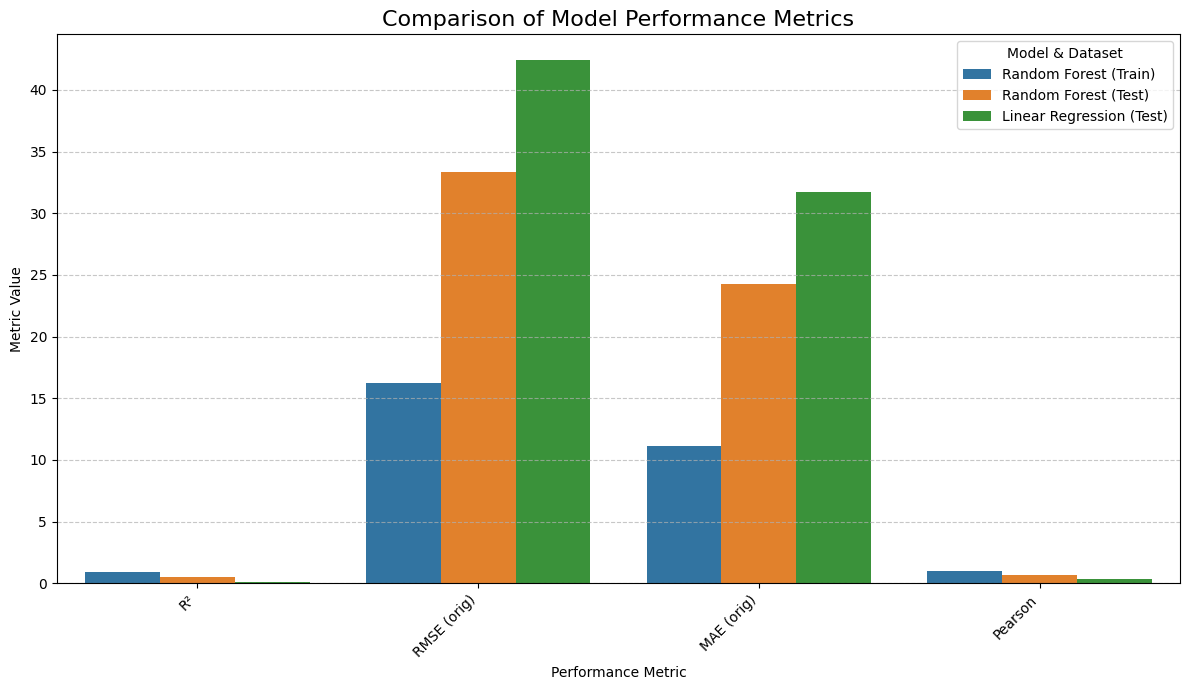

Generated plot for model performance metrics comparison.


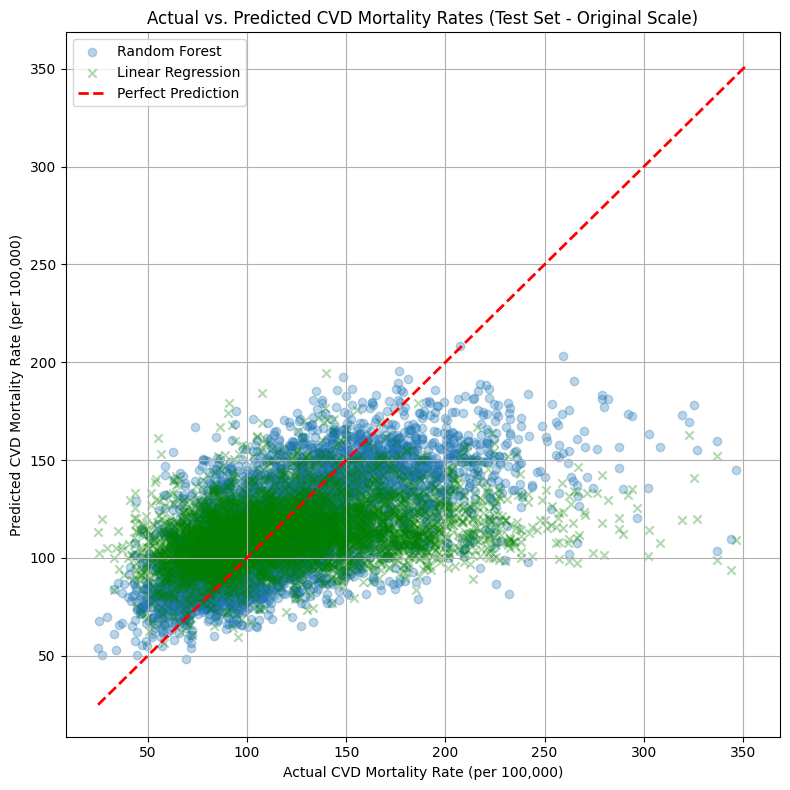

Generated Actual vs. Predicted plot on original scale.


In [11]:
# ================================
# 6) back transformations and baseline comparison
# ================================


# --- 1. Back-transform y and predictions to original scale ---
#  target y is log_cvd_mortality_rate.
# If using np.log(Data_Value):
# y_train_orig = np.exp(y_train)
# y_train_pred_orig = np.exp(y_train_pred)
# y_test_orig = np.exp(y_test)
# y_test_pred_orig = np.exp(y_test_pred)
# y_test_pred_baseline_orig = np.exp(y_test_pred_baseline)

# If using np.log1p(Data_Value) because Data_Value could be 0 (min was 1.5, so np.log was fine):
# For consistency with previous log transformation cell which used np.log:
log_and_print("\n--- Back-transforming predictions and actuals to original scale ---")
try:
    y_train_orig = np.exp(y_train)
    y_train_pred_orig = np.exp(y_train_pred)
    y_test_orig = np.exp(y_test)
    y_test_pred_orig = np.exp(y_test_pred)
    y_test_pred_baseline_orig = np.exp(y_test_pred_baseline)
    log_and_print("Successfully back-transformed using np.exp().")
except Exception as e:
    log_and_print(f"Error during np.exp back-transformation: {e}. Ensure y values are log-transformed.", level=logging.ERROR)
    # Fallback or exit if critical
    # As fallback, proceed with log-scale metrics for MAE/RMSE/MAPE,
    # but its better to ensure back-transformation works
    y_train_orig, y_train_pred_orig, y_test_orig, y_test_pred_orig, y_test_pred_baseline_orig = [None]*5


# --- 2. Recalculate MAE, RMSE, MAPE on original scale ---
metrics_orig_scale = {
    "Train": {},
    "Test": {},
    "Baseline_Test": {}
}

if y_train_orig is not None:
    metrics_orig_scale["Train"]["MAE_orig"] = mean_absolute_error(y_train_orig, y_train_pred_orig)
    metrics_orig_scale["Train"]["RMSE_orig"] = mean_squared_error(y_train_orig, y_train_pred_orig, squared=False)
    metrics_orig_scale["Train"]["MAPE_orig"] = np.mean(np.abs((y_train_orig - y_train_pred_orig) / y_train_orig)) * 100

if y_test_orig is not None:
    metrics_orig_scale["Test"]["MAE_orig"] = mean_absolute_error(y_test_orig, y_test_pred_orig)
    metrics_orig_scale["Test"]["RMSE_orig"] = mean_squared_error(y_test_orig, y_test_pred_orig, squared=False)
    metrics_orig_scale["Test"]["MAPE_orig"] = np.mean(np.abs((y_test_orig - y_test_pred_orig) / y_test_orig)) * 100
    
    metrics_orig_scale["Baseline_Test"]["MAE_orig"] = mean_absolute_error(y_test_orig, y_test_pred_baseline_orig)
    metrics_orig_scale["Baseline_Test"]["RMSE_orig"] = mean_squared_error(y_test_orig, y_test_pred_baseline_orig, squared=False)
    metrics_orig_scale["Baseline_Test"]["MAPE_orig"] = np.mean(np.abs((y_test_orig - y_test_pred_baseline_orig) / y_test_orig)) * 100

log_and_print("\n--- Metrics on Original Scale (Deaths per 100,000) ---")
if metrics_orig_scale["Train"]:
    log_and_print("Random Forest - Train Set (Original Scale):")
    log_and_print(f"  MAE: {metrics_orig_scale['Train']['MAE_orig']:.2f}")
    log_and_print(f"  RMSE: {metrics_orig_scale['Train']['RMSE_orig']:.2f}")
    log_and_print(f"  MAPE: {metrics_orig_scale['Train']['MAPE_orig']:.2f}%")

if metrics_orig_scale["Test"]:
    log_and_print("Random Forest - Test Set (Original Scale):")
    log_and_print(f"  MAE: {metrics_orig_scale['Test']['MAE_orig']:.2f}")
    log_and_print(f"  RMSE: {metrics_orig_scale['Test']['RMSE_orig']:.2f}")
    log_and_print(f"  MAPE: {metrics_orig_scale['Test']['MAPE_orig']:.2f}%")

if metrics_orig_scale["Baseline_Test"]:
    log_and_print("Linear Regression - Test Set (Original Scale):")
    log_and_print(f"  MAE: {metrics_orig_scale['Baseline_Test']['MAE_orig']:.2f}")
    log_and_print(f"  RMSE: {metrics_orig_scale['Baseline_Test']['RMSE_orig']:.2f}")
    log_and_print(f"  MAPE: {metrics_orig_scale['Baseline_Test']['MAPE_orig']:.2f}%")

# --- 3. Plot Key Metrics Comparison ---
# Using the log-scale metrics from previous cell for R2 and Pearson
# And original-scale metrics for RMSE and MAE

# Data for plotting (from previous cell's 'metrics' and 'baseline_metrics' dicts)
# And from metrics_orig_scale calculated above
plot_metrics_data = {
    'Metric': ['R²', 'RMSE (orig)', 'MAE (orig)', 'Pearson'],
    'Random Forest (Train)': [
        metrics["Train"]["R2"], 
        metrics_orig_scale["Train"].get("RMSE_orig", float('nan')), 
        metrics_orig_scale["Train"].get("MAE_orig", float('nan')),
        metrics["Train"]["Pearson"]
    ],
    'Random Forest (Test)': [
        metrics["Test"]["R2"], 
        metrics_orig_scale["Test"].get("RMSE_orig", float('nan')),
        metrics_orig_scale["Test"].get("MAE_orig", float('nan')),
        metrics["Test"]["Pearson"]
    ],
    'Linear Regression (Test)': [
        baseline_metrics["R2"],
        metrics_orig_scale["Baseline_Test"].get("RMSE_orig", float('nan')),
        metrics_orig_scale["Baseline_Test"].get("MAE_orig", float('nan')),
        baseline_metrics["Pearson"]
    ]
}
df_plot_metrics = pd.DataFrame(plot_metrics_data)

# Melt for easier plotting with seaborn
df_plot_metrics_melted = df_plot_metrics.melt(id_vars='Metric', var_name='Model_Set', value_name='Value')

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Value', hue='Model_Set', data=df_plot_metrics_melted)
plt.title('Comparison of Model Performance Metrics', fontsize=16)
plt.ylabel('Metric Value')
plt.xlabel('Performance Metric')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Model & Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# if LOG_DIR: plt.savefig(os.path.join(LOG_DIR, "model_metrics_comparison.png"))
plt.show()

log_and_print("Generated plot for model performance metrics comparison.")

# --- 4. Predicted vs. Actual Plot (on original scale for better intuition) ---
if y_test_orig is not None and y_test_pred_orig is not None:
    plt.figure(figsize=(8, 8))
    # Use a sample if too many points for a clear scatter plot
    sample_idx = np.random.choice(len(y_test_orig), size=min(5000, len(y_test_orig)), replace=False)
    
    plt.scatter(y_test_orig.iloc[sample_idx] if isinstance(y_test_orig, pd.Series) else y_test_orig[sample_idx], 
                y_test_pred_orig.iloc[sample_idx] if isinstance(y_test_pred_orig, pd.Series) else y_test_pred_orig[sample_idx], 
                alpha=0.3, label="Random Forest")
    
    # Add baseline predictions
    if y_test_pred_baseline_orig is not None:
         plt.scatter(y_test_orig.iloc[sample_idx] if isinstance(y_test_orig, pd.Series) else y_test_orig[sample_idx], 
                     y_test_pred_baseline_orig.iloc[sample_idx] if isinstance(y_test_pred_baseline_orig, pd.Series) else y_test_pred_baseline_orig[sample_idx], 
                     alpha=0.3, label="Linear Regression", color='green', marker='x')

    min_val = min(y_test_orig.min(), y_test_pred_orig.min())
    max_val = max(y_test_orig.max(), y_test_pred_orig.max())
    plt.plot([min_val, max_val], [min_val, max_val], '--r', linewidth=2, label="Perfect Prediction")
    
    plt.xlabel("Actual CVD Mortality Rate (per 100,000)")
    plt.ylabel("Predicted CVD Mortality Rate (per 100,000)")
    plt.title("Actual vs. Predicted CVD Mortality Rates (Test Set - Original Scale)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # if LOG_DIR: plt.savefig(os.path.join(LOG_DIR, "actual_vs_predicted_orig_scale.png"))
    plt.show()
    log_and_print("Generated Actual vs. Predicted plot on original scale.")
else:
    log_and_print("Could not generate Actual vs. Predicted plot due to missing back-transformed data.")




================ Generating Learning Curves ================
Generating learning curves for model: RandomForestRegressor
Learning curve scores calculated.
Training sizes (absolute): [ 2738  5477  8216 10955 13694 16432 19171 21910 24649 27388]
Mean Training RMSEs: [0.13512538 0.13187236 0.13073993 0.12882167 0.12758641 0.12690524
 0.12629493 0.12525256 0.12473592 0.12407621]
Mean Validation RMSEs: [0.29772845 0.289665   0.28469563 0.28099105 0.27832931 0.27655329
 0.27483856 0.27334872 0.27195027 0.2706396 ]


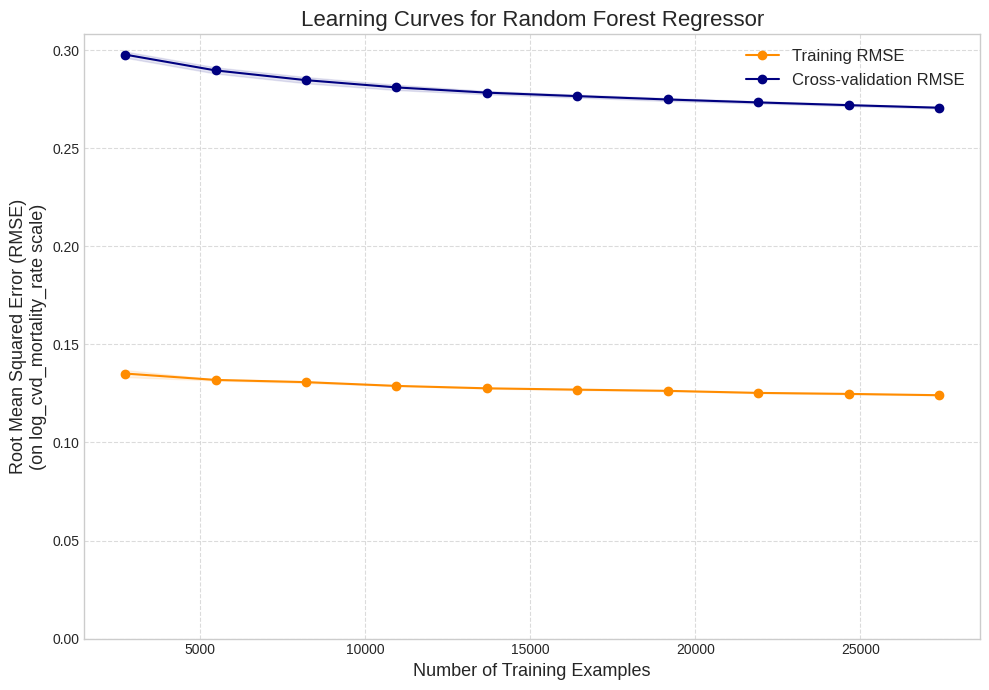

Learning curves generated and plotted successfully.


In [12]:
# ================================
# 7) Learning Curves
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error # For RMSE calculation 
import os # For saving plots if LOG_DIR is used

# --- these are defined from previous cells ---
# best_model: tuned RandomForestRegressor model from RandomizedSearchCV
# X_train: training features (after one-hot encoding)
# y_train: training target (log_cvd_mortality_rate)
# log_and_print: logging function
# LOG_DIR: directory for saving logs/plots

# --- Ensure variables are available  ---
if 'best_model' not in locals() or 'X_train' not in locals() or 'y_train' not in locals():
    log_and_print("ERROR: best_model, X_train, or y_train not found. Please run previous cells.", level=logging.ERROR if 'logging' in locals() else None)
    
    # import joblib
    # best_model = joblib.load(os.path.join(LOG_DIR, "best_rf_model.joblib"))
    # And load X_train, y_train (from a saved file or re-run split)
    # This is just illustrative, if you run the cells consecutively/one after the other theyd be in memory
    exit() 

log_and_print("\n================ Generating Learning Curves ================")
log_and_print(f"Generating learning curves for model: {type(best_model).__name__}")

try:
    # Define training sizes to evaluate
    # Using 10 points from 10% to 100% of the training data
    train_sizes_abs = np.linspace(0.1, 1.0, 10, dtype=float)

    # Calculate learning curves
    # cv=3 is a bit low for high confidence, but faster. Consider cv=5 or higher if time/compute permits
    # n_jobs=-1 uses all available CPU cores.
    # scoring='neg_root_mean_squared_error' means higher scores are better (less negative).
    train_sizes, train_scores_cv, validation_scores_cv = learning_curve(
        estimator=best_model,
        X=X_train,
        y=y_train,
        train_sizes=train_sizes_abs,
        cv=5, 
        scoring='neg_root_mean_squared_error', # We want RMSE
        n_jobs=-1,
        random_state=42 # For reproducibility of the CV splits within learning_curve
    )

    # Calculate mean and standard deviation for training and validation scores
    # Scores are negative RMSE, so negate them to get positive RMSE
    train_rmse_mean = -np.mean(train_scores_cv, axis=1)
    train_rmse_std = np.std(train_scores_cv, axis=1) # Std of neg_rmse, so magnitude is fine
    validation_rmse_mean = -np.mean(validation_scores_cv, axis=1)
    validation_rmse_std = np.std(validation_scores_cv, axis=1)

    log_and_print("Learning curve scores calculated.")
    log_and_print(f"Training sizes (absolute): {train_sizes}")
    log_and_print(f"Mean Training RMSEs: {train_rmse_mean}")
    log_and_print(f"Mean Validation RMSEs: {validation_rmse_mean}")

    # Plotting the learning curves
    plt.figure(figsize=(10, 7))
    plt.style.use('seaborn-v0_8-whitegrid') # Using a seaborn style

    # Plot mean training error
    plt.plot(train_sizes, train_rmse_mean, 'o-', color="darkorange",
             label="Training RMSE")
    # Plot standard deviation bands for training error
    plt.fill_between(train_sizes, train_rmse_mean - train_rmse_std,
                     train_rmse_mean + train_rmse_std, alpha=0.1, color="darkorange")

    # Plot mean validation error
    plt.plot(train_sizes, validation_rmse_mean, 'o-', color="navy",
             label="Cross-validation RMSE")
    # Plot standard deviation bands for validation error
    plt.fill_between(train_sizes, validation_rmse_mean - validation_rmse_std,
                     validation_rmse_mean + validation_rmse_std, alpha=0.1, color="navy")

    plt.title("Learning Curves for Random Forest Regressor", fontsize=16)
    plt.xlabel("Number of Training Examples", fontsize=13)
    plt.ylabel("Root Mean Squared Error (RMSE)\n(on log_cvd_mortality_rate scale)", fontsize=13)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.ylim(bottom=0) # RMSE should not be negative
    plt.tight_layout()
    
    # if 'LOG_DIR' in locals() and LOG_DIR is not None:
    #     plot_path = os.path.join(LOG_DIR, "rf_learning_curve.png")
    #     plt.savefig(plot_path)
    #     log_and_print(f"Learning curve plot saved to {plot_path}")
    plt.show()
    
    log_and_print("Learning curves generated and plotted successfully.")

except Exception as e:
    log_and_print(f"Error generating learning curves: {e}", level=logging.ERROR if 'logging' in locals() else None)




================ Calculating Permutation Feature Importance ================
Calculating permutation importance for model: RandomForestRegressor on X_test

Permutation Feature Importance (Top 20):
              feature  importance_mean  importance_std
4      std_ozone_pred         0.052051        0.000533
3      p95_ozone_pred         0.046834        0.000828
1   median_ozone_pred         0.042932        0.000925
0     mean_ozone_pred         0.042289        0.000961
5     log_popestimate         0.039050        0.001229
2      max_ozone_pred         0.028385        0.000967
17          year_2013         0.005689        0.000314
18          year_2014         0.005632        0.000324
16          year_2012         0.005467        0.000358
7           year_2003         0.004806        0.000352
6           year_2002         0.004642        0.000359
13          year_2009         0.004614        0.000310
14          year_2010         0.003750        0.000272
8           year_2004         0.

/tmp/ipykernel_97995/951024989.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance_mean', y='feature', data=perm_importance_df.head(top_n), palette="viridis")


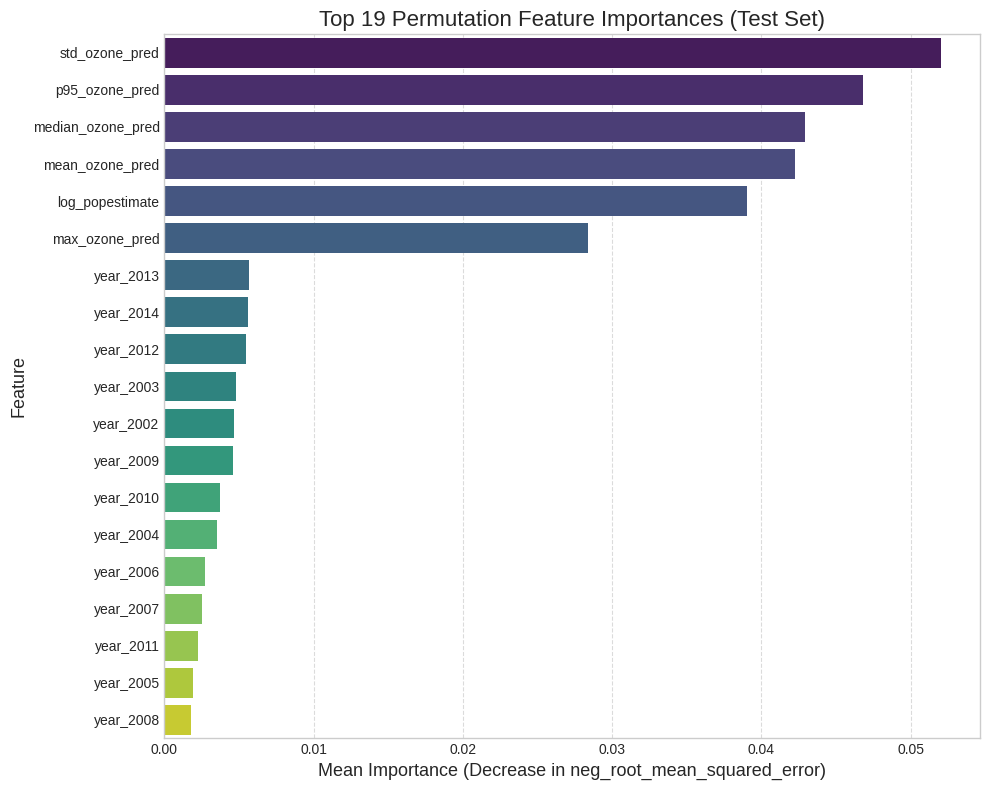

Permutation feature importance calculated and plotted successfully.


In [13]:
# ================================
# 8) Permutation Feature Importance
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error 
import os # For saving plots if LOG_DIR is used

# --- these are defined from previous cells ---
# best_model: the tuned RandomForestRegressor model
# X_test: the test features (after one-hot encoding)
# y_test: the test target (log_cvd_mortality_rate)
# log_and_print: the logging function
# LOG_DIR: the directory for saving logs/plots (optional)

# --- Ensure variables are available ---
if 'best_model' not in locals() or 'X_test' not in locals() or 'y_test' not in locals():
    log_and_print("ERROR: best_model, X_test, or y_test not found. Please run previous cells.", level=logging.ERROR if 'logging' in locals() else None)
    # exit()
else:
    log_and_print("\n================ Calculating Permutation Feature Importance ================")
    log_and_print(f"Calculating permutation importance for model: {type(best_model).__name__} on X_test")

    try:
        # Calculate permutation importance
        # scoring='neg_root_mean_squared_error' means a higher score is better.
        # The importance will be the drop in this score when a feature is permuted.
        # Thus, a positive importance_mean indicates the feature is important.
        perm_importance_result = permutation_importance(
            best_model,
            X_test,
            y_test,
            scoring='neg_root_mean_squared_error',
            n_repeats=10,       # Number of times to permute each feature
            random_state=42,
            n_jobs=-1           # Use all available cores
        )

        # Create a DataFrame for easier viewing and plotting
        perm_importance_df = pd.DataFrame({
            'feature': X_test.columns,
            'importance_mean': perm_importance_result.importances_mean,
            'importance_std': perm_importance_result.importances_std
        }).sort_values(by='importance_mean', ascending=False)

        log_and_print("\nPermutation Feature Importance (Top 20):")
        log_and_print(perm_importance_df.head(20).to_string()) # .to_string() for better logging of DataFrame

        # Plotting the permutation importances
        plt.figure(figsize=(10, 8)) # Adjust size as needed
        # Plotting top N features, e.g., top 20
        top_n = min(20, len(perm_importance_df)) 
        sns.barplot(x='importance_mean', y='feature', data=perm_importance_df.head(top_n), palette="viridis")
        plt.title(f'Top {top_n} Permutation Feature Importances (Test Set)', fontsize=16)
        plt.xlabel('Mean Importance (Decrease in neg_root_mean_squared_error)', fontsize=13)
        plt.ylabel('Feature', fontsize=13)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        # if 'LOG_DIR' in locals() and LOG_DIR is not None:
        #     plot_path = os.path.join(LOG_DIR, "rf_permutation_importance.png")
        #     plt.savefig(plot_path)
        #     log_and_print(f"Permutation importance plot saved to {plot_path}")
        plt.show()
        
        log_and_print("Permutation feature importance calculated and plotted successfully.")

    except Exception as e:
        log_and_print(f"Error calculating or plotting permutation importance: {e}", level=logging.ERROR if 'logging' in locals() else None)



In [14]:
# ================================
# 9) Shapley Additive eXPlanations
# ================================

# -------------------------------------------
# parallel_shap.py  ·  helper for SHAP values
# -------------------------------------------
import os
import math
import logging
import numpy as np
import pandas as pd
import shap
from concurrent.futures import ProcessPoolExecutor, as_completed
from functools import partial
import ast 

from pathlib import Path
import joblib

# ---------- 0) Paths ----------
MODEL_PATH   = Path("/mnt/c/Users/WSTATION/Desktop/GEOAI_ML/log_folder/best_rf_model.joblib")

if not MODEL_PATH.exists():
    raise FileNotFoundError(f"Saved model not found: {MODEL_PATH}")

best_model = joblib.load(MODEL_PATH)          

# ------------------------
# 0) Configurable knobs
# ------------------------
NUM_WORKERS_SHAP   = 24
BG_SIZE            = 100     # background rows
FG_SIZE            = 5_000   # foreground rows per run
CHUNK_SIZE         = 1_000   # rows each worker handles
CHECK_ADDITIVITY   = False   # skip expensive consistency check

# ------------------------
# 1) One worker’s job
# ------------------------
def _calc_shap_chunk(model, bg, fg_chunk):
    """
    Compute SHAP values for a slice of the foreground rows.

    Notes
    -----
    • Each process builds its own explainer; TreeExplainer isn’t thread-safe.
    • bg (background) and fg_chunk must be pandas DataFrames.
    """
    # ensure purely numeric data
    bg_num = bg.astype("float64")
    fg_num = fg_chunk.astype("float64")

    explainer = shap.TreeExplainer(
        model,
        data=bg_num,
        feature_perturbation="interventional",
        model_output="raw"
    )
    return explainer.shap_values(fg_num)


# ------------------------
# 2) Public helper
# ------------------------
def compute_shap_parallel(model, X_train):
    """Return (shap_values, fg_sample) using NUM_WORKERS_SHAP processes."""
    log_and_print(
        f"[SHAP] sampling bg={BG_SIZE}, fg≤{FG_SIZE}, "
        f"workers={NUM_WORKERS_SHAP}, chunk={CHUNK_SIZE}"
    )

    # --- samples ------------------------------------------------------------
    bg = shap.sample(X_train, BG_SIZE,  random_state=42)
    fg = shap.sample(X_train, min(FG_SIZE, len(X_train)), random_state=42)

    # --- split foreground into equal chunks --------------------------------
    n_chunks = math.ceil(len(fg) / CHUNK_SIZE)
    chunks   = [
        fg.iloc[i * CHUNK_SIZE : (i + 1) * CHUNK_SIZE] for i in range(n_chunks)
    ]

    log_and_print(f"[SHAP] foreground split into {n_chunks} chunk(s)")

    # --- parallel map -------------------------------------------------------
    shap_results = []
    with ProcessPoolExecutor(max_workers=NUM_WORKERS_SHAP) as exe:
        fut_to_idx = {
            exe.submit(_calc_shap_chunk, model, bg, c): idx
            for idx, c in enumerate(chunks)
        }

        for fut in as_completed(fut_to_idx):
            idx = fut_to_idx[fut]
            try:
                shap_chunk = fut.result()
                shap_results.append((idx, shap_chunk))
                log_and_print(f"[SHAP] chunk {idx+1}/{n_chunks} done")
            except Exception as exc:
                log_and_print(f"[SHAP] chunk {idx+1} failed: {exc}")

    if not shap_results:
        raise RuntimeError("All SHAP workers failed!")

    # --- re-assemble in original order -------------------------------------
    shap_results.sort(key=lambda x: x[0])
    shap_values = np.vstack([v for _, v in shap_results])

    log_and_print("[SHAP] completed – final shape {shap_values.shape}")
    return shap_values, fg


[SHAP] sampling bg=100, fg≤5000, workers=24, chunk=1000
[SHAP] foreground split into 5 chunk(s)


 96%|=================== | 965/1000 [06:15<00:13]       

[SHAP] chunk 1/5 done


 98%|===================| 985/1000 [06:20<00:05]        

[SHAP] chunk 2/5 done


 98%|===================| 983/1000 [06:21<00:06]       

[SHAP] chunk 3/5 done


100%|===================| 999/1000 [06:25<00:00]       

[SHAP] chunk 4/5 done


100%|===================| 998/1000 [06:26<00:00]       

[SHAP] chunk 5/5 done
[SHAP] completed – final shape {shap_values.shape}


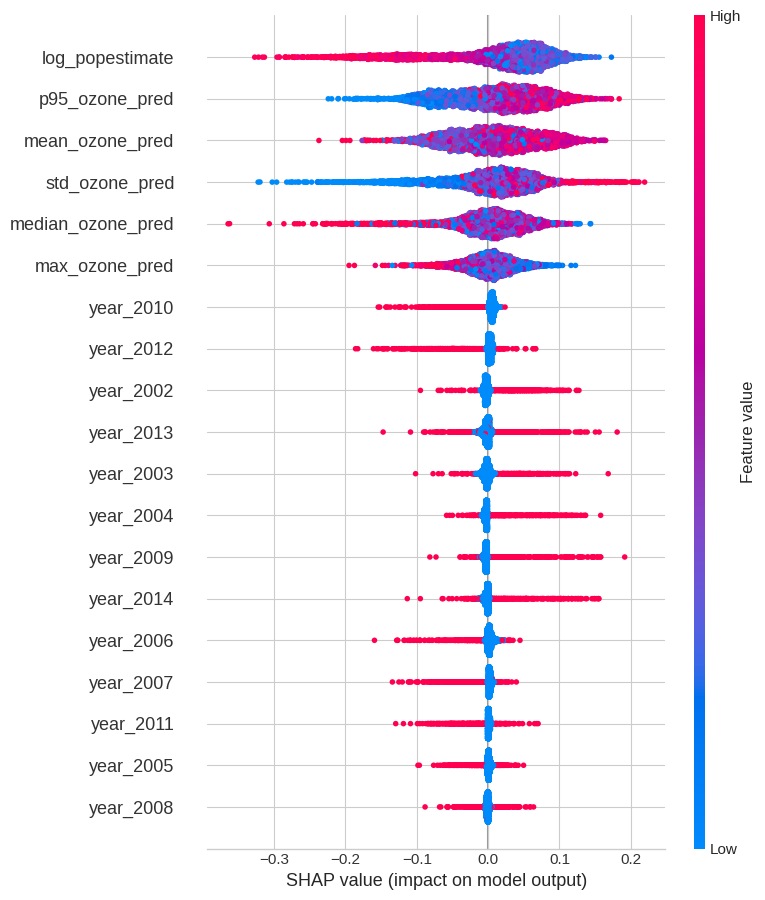

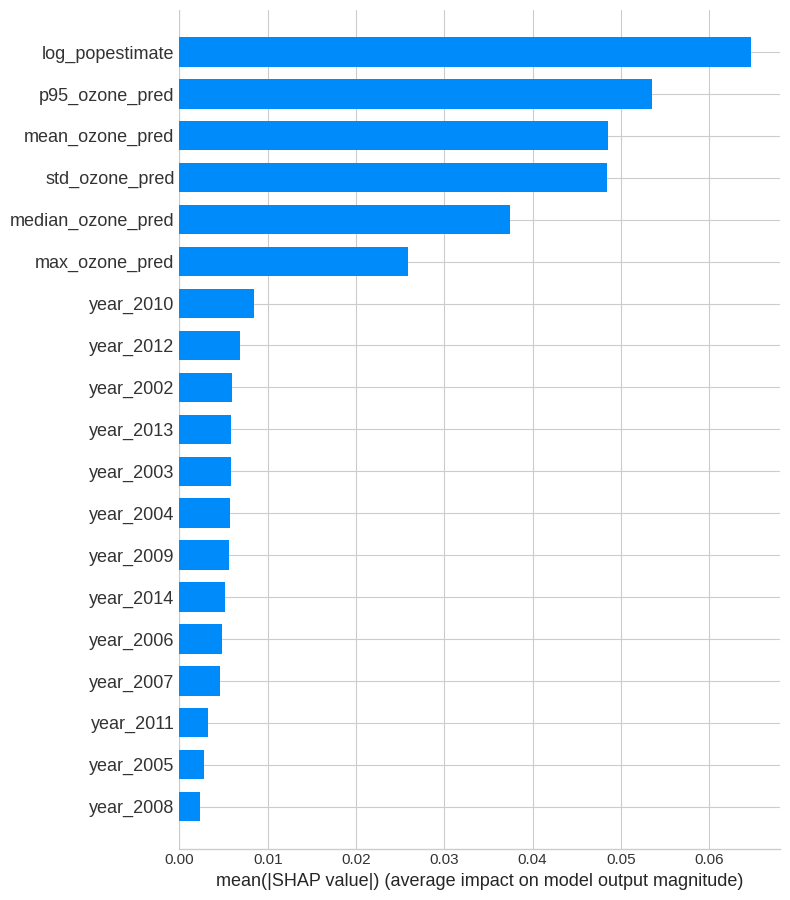

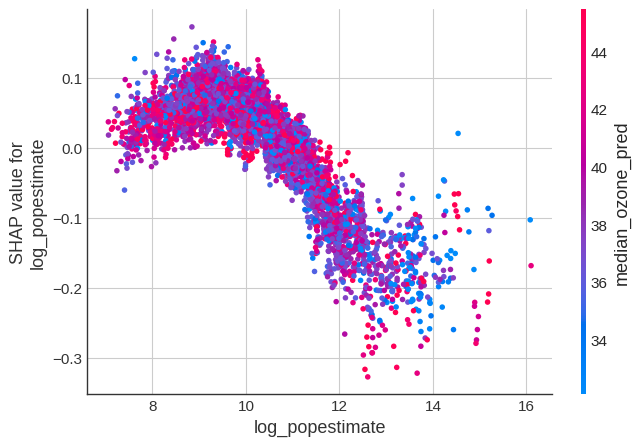

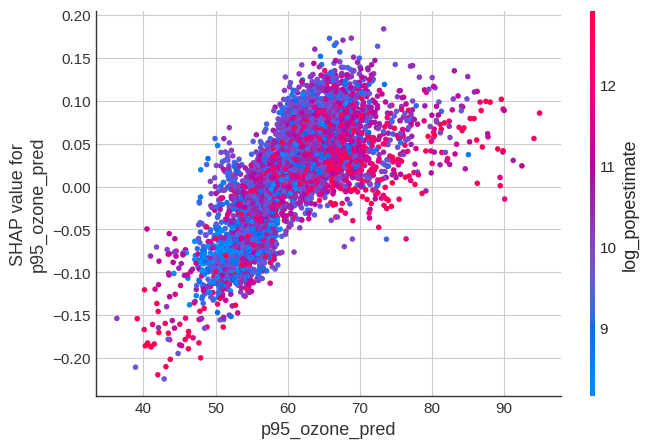

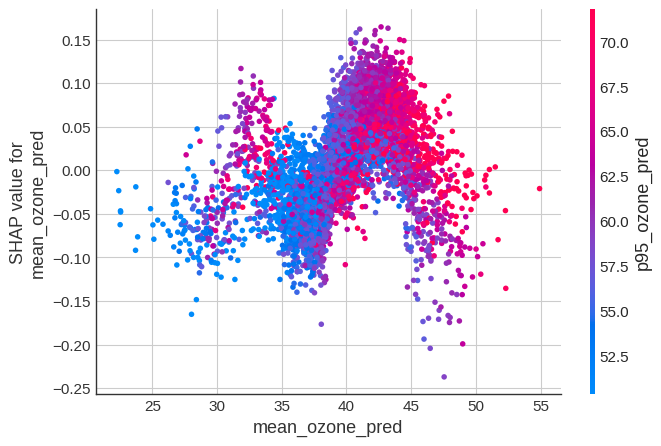

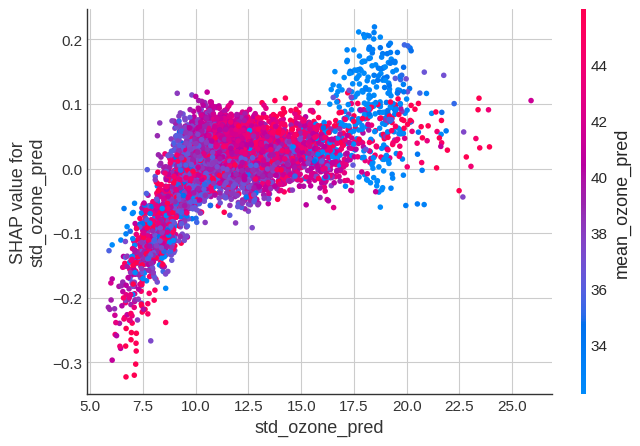

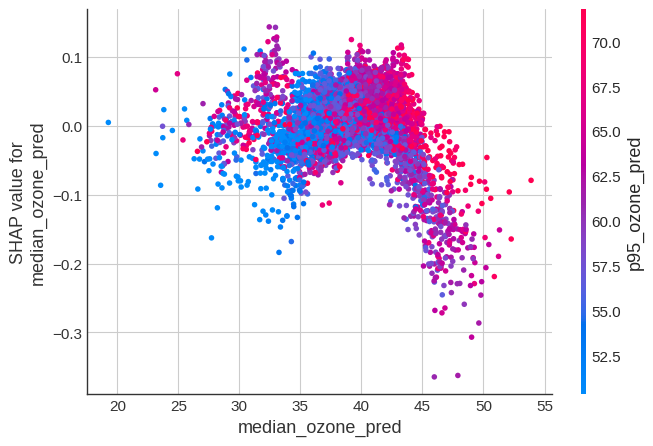

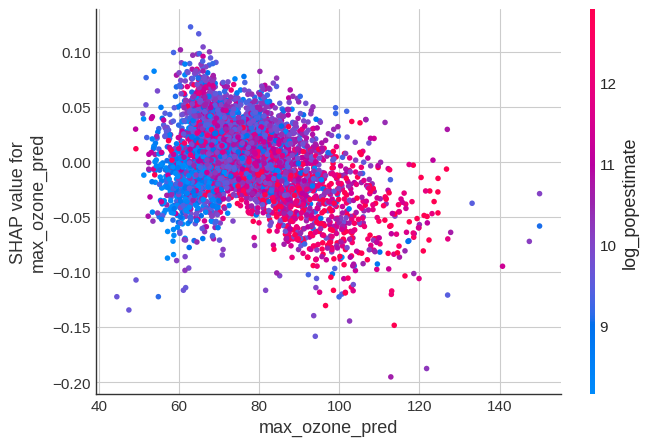

In [15]:
shap_vals, fg_sample = compute_shap_parallel(best_model, X_train)

# Global plots
import shap, matplotlib.pyplot as plt, numpy as np
shap.summary_plot(shap_vals, fg_sample, plot_type="dot")
shap.summary_plot(shap_vals, fg_sample, plot_type="bar")

# Dependence plots for top 6 features
abs_mean = np.abs(shap_vals).mean(axis=0)
top_feats = fg_sample.columns[np.argsort(abs_mean)[::-1][:6]]
for feat in top_feats:
    shap.dependence_plot(feat, shap_vals, fg_sample, interaction_index="auto")
    plt.show()